# K-Nearest Neighbors

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')


In [3]:
df.head(9)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
5,2,41,39,0,17,78.0,2,16,0.0,1,1,3
6,3,45,22,1,2,19.0,2,4,0.0,1,5,2
7,2,38,35,0,5,76.0,2,10,0.0,0,3,4
8,3,45,59,1,7,166.0,4,31,0.0,0,5,3


Data Hakkında

* 1 = Basic Sevice
* 2 = E-Service
* 3 = Plus Service
* 4 = Total Service

In [4]:
df["custcat"].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<AxesSubplot:title={'center':'income'}>]], dtype=object)

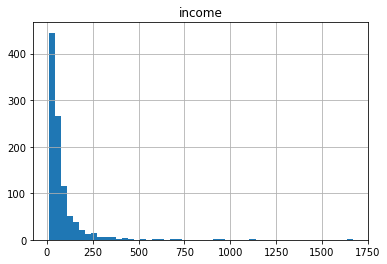

In [5]:
df.hist(column="income", bins=50)

<AxesSubplot:xlabel='age', ylabel='income'>

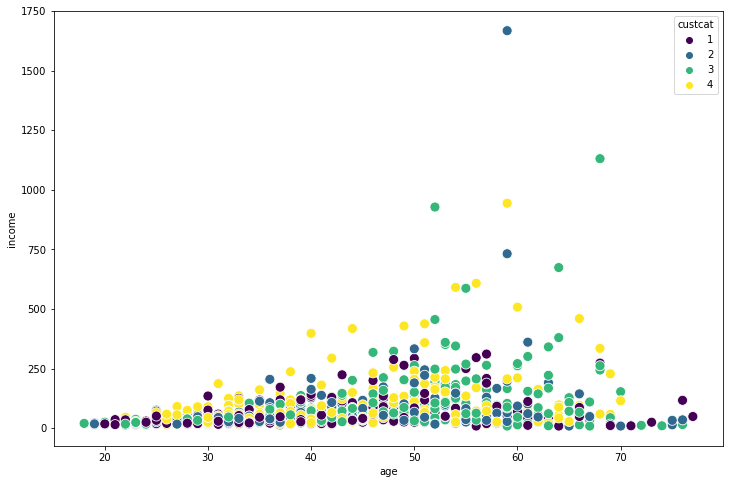

In [6]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='age', y='income', hue='custcat', data=df, palette='viridis', s=100)

1- Pick a value for K. 2- Calculate the distance of unknown case from all cases. (dissimilarity) 3- Select the K-observations in the training data that are "nearest" to the unknown data point. 4- Predict the response of the unknown data point, using the most popular response value from the K-nearest neigbors.

For unknown case, first pick K=1 Calculate and make prediction until K=20 Compare results.

* K=1 may capture the noise in data. A low value of K causes over-fitting. Prediction is not good enough for out-of-sample cases.
* K=20 The model becomes overly generalized, if value of K is too high.
* If we use 2 features (age, income), we are using it in a 2-dimensional space.
* We can also use the same distance matrix for multi-dimensional vectors.

### Exercise
* Normalize the data: StandardScaler
* Classification: KNeighborsClassifier
* Training: k = 4
* Evaluation: accuracy_score()

In [ ]:
df.columns

In [ ]:
X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside']].v

In [ ]:
X[0:5]

In [ ]:
y = df['custcat'].values

In [ ]:
y[0:5]

## Normalize

In [ ]:
from sklearn import preprocessing

# Normalize Data
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [ ]:
X[0:5]

## Train/Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)


In [ ]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

## Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k = 4

neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

In [ ]:
neigh

## Prediction

In [ ]:
y_hat = neigh.predict(X_test)
y_hat[0:5]

## Accuracy Evaluation

In [ ]:
from sklearn import metrics

print("Train set accuracy:", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set accuracy:", metrics.accuracy_score(y_test, y_hat))

In [ ]:
# Check other Ks

k = 6
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = neigh6.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

## Check accuracy of Ks

In [ ]:
from sklearn import metrics
Ks = 10

mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1, Ks):
    # train and prediction for each k
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    y_hat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_hat)
    std_acc[n-1] = np.std(y_hat==y_test)/np.sqrt(y_hat.shape[0])

In [ ]:
mean_acc

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [ ]:

print( "The best accuracy", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

Practice
* Implement the K-Nearest Neighbors (KNN) model using a different dataset.
* Research on evaluation metrics applicable to KNN. (Jaccard index, log loss, F1-score)
* Blog post about model evaluation techniques in machine learning.
* Select a real-world dataset for your final project and conduct a preliminary analysis of the data. You are expected to present your preliminary findings and outline the planned steps for the project during the lesson scheduled for next Sunday.